# Hoja de Trabajo 05

Manuel Rodas 21509
Sebas Estrada 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

/tmp/ipykernel_7093/2822655967.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Exploración y Preprocesamiento de Datos

In [2]:
df1 = pd.read_csv('winequality-red.csv', sep=';' )

df2 = pd.read_csv('winequality-white.csv', sep=';' )

In [3]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
# Estadísticas descriptivas
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,-0.988118
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.134188
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,-1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,-1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,-1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,-1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [21]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,-0.644140
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,2.381808
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,-1.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,-1.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,-1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,-1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,23.000000


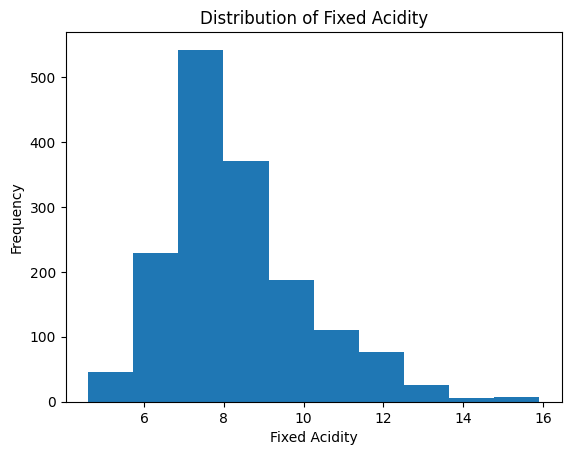

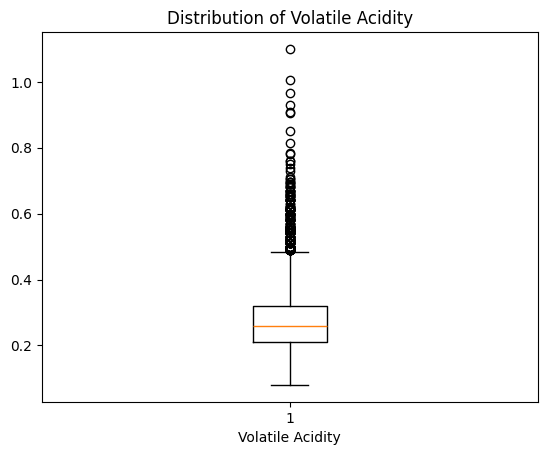

In [5]:


# Distribución de variables
import matplotlib.pyplot as plt

# Histograma de una variable en df1
plt.hist(df1['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Distribution of Fixed Acidity')
plt.show()

# Gráfico de caja de una variable en df2
plt.boxplot(df2['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.title('Distribution of Volatile Acidity')
plt.show()



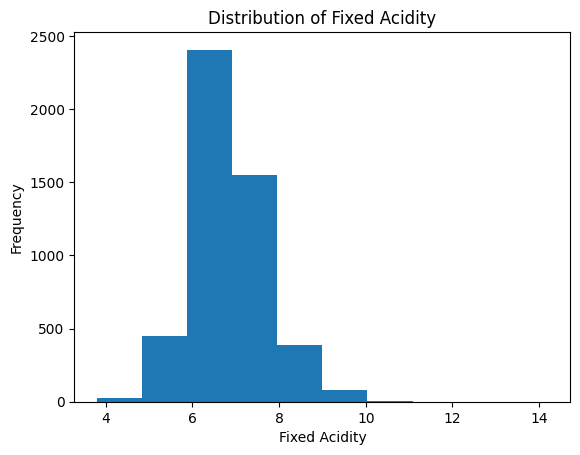

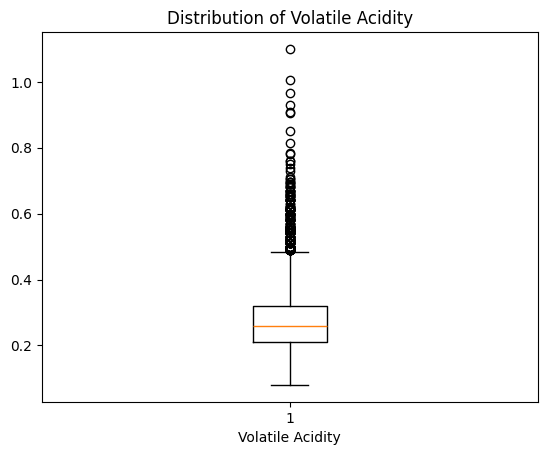

In [6]:
#ahora con el df2
# Estadísticas descriptivas
df2.describe()

# Distribución de variables
import matplotlib.pyplot as plt

# Histograma de una variable en df2
plt.hist(df2['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Distribution of Fixed Acidity')
plt.show()

# Gráfico de caja de una variable en df2
plt.boxplot(df2['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.title('Distribution of Volatile Acidity')
plt.show()


In [7]:

# Cleaning and handling missing values
df1_cleaned = df1.dropna()  # Drop rows with missing values
df2_cleaned = df2.fillna(0)  # Fill missing values with 0

# Normalization/Standardization
scaler = StandardScaler()
df1_normalized = scaler.fit_transform(df1_cleaned)
df2_normalized = scaler.transform(df2_cleaned)


### División del Conjunto de Datos

In [8]:
from sklearn.model_selection import train_test_split
#dsa
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_normalized, df1['quality'], test_size=0.2, random_state=42)



In [9]:
#ahora con df2_normalized
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2_normalized, df2['quality'], test_size=0.2, random_state=42)

### Selección y Entrenamiento de Modelos 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#sdad
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


/home/sestradat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [11]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy')

# Realizar el ajuste de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de prueba
accuracy = best_model.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("Exactitud del mejor modelo:", accuracy)



Mejores hiperparámetros: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Exactitud del mejor modelo: 0.9244897959183673


## Validacion cruzada

In [19]:
# Realizar la validacion cruzada 
from sklearn.model_selection import cross_val_score

# Validación cruzada para el modelo de regresión logística
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Validación cruzada para el modelo de k-vecinos más cercanos
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Validación cruzada para el modelo de bosque aleatorio
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Regresión logística:", logreg_scores.mean())
print("K-vecinos más cercanos:", knn_scores.mean())
print("Bosque aleatorio:", rf_scores.mean())


# comparar el valor mas alto
best_model = max(logreg_scores.mean(), knn_scores.mean(), rf_scores.mean())

print("Mejor modelo:", best_model)
print("El mejor modelo es el de Bosque Aleatorio")

/home/sestradat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sestradat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Regresión logística: 0.9943848228946752
K-vecinos más cercanos: 0.8928020825188312
Bosque aleatorio: 0.9948953527771263
Mejor modelo: 0.9948953527771263
El mejor modelo es el de Bosque Aleatorio


## Interpretacion de los datos

Al comparar los 3 datos generados anterior mente, podemos observar que El mejor modelo es el Random Forest debido a que es el valor mas cercano a uno, por lo tanto tiene una alta complegidad despues podemos ver que en la regresion lineal tenemos un valor tan alto por lo cual tambien podemos decir que es un modelo bueno y complejo. Por ultimo se encuentra Knn que cuenta con un valor alto pero no tan alto como los anteriores mencionados por lo cual esta regresion es compleja pero no se acerca tanto como las anteriores

## Conclusion

En base a lo anteriormente mencionado la mejor regresion para este caso fue Random Forest, debido a que cuenta con mejor desempeño general en el conjunto de datos, seguido por la regresion lineal y por Knn. Por lo que Random forest muestra una mejor complejidad para representar el conjunto de datos de los vecinos cercanos.|